# Домашнє завдання: Прогнозування орендної плати за житло

## Мета завдання
Застосувати знання з лекції для побудови моделі лінійної регресії, що прогнозує орендну плату за житло в Індії. Ви пройдете весь цикл вирішення задачі машинного навчання: від дослідницького аналізу до оцінки якості моделі.

## Опис датасету
**House Rent Prediction Dataset** містить інформацію про 4700+ оголошень про оренду житла в Індії з такими параметрами:
- **BHK**: Кількість спалень, залів, кухонь
- **Rent**: Орендна плата (цільова змінна)
- **Size**: Площа в квадратних футах
- **Floor**: Поверх та загальна кількість поверхів
- **Area Type**: Тип розрахунку площі
- **Area Locality**: Район
- **City**: Місто
- **Furnishing Status**: Стан меблювання
- **Tenant Preferred**: Тип орендаря
- **Bathroom**: Кількість ванних кімнат
- **Point of Contact**: Контактна особа

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `House_Rent_Dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (включно з типами даних та кількістю значень)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df_rent = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/House_Rent_Dataset.csv')

In [4]:
df_rent.shape

(4746, 12)

In [5]:
df_rent.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [6]:
df_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


## Завдання 2: Дослідницький аналіз даних (EDA) (4 бали)

**Що потрібно зробити:**
1. **Аналіз пропущених значень.** Перевірте наявність і відсоток пропущених значень у кожній колонці
2. **Базова статистика.** Обчисліть базову статистику (середнє, квартилі, стандартне відхилення) для числових змінних.
3. **Аналіз цільової змінної.** Побудуйте гістограму розподілу цільової змінної (Rent)
4. **Робота з викидами.** Знайдіть та видаліть викиди в цільовій змінній (якщо є). Визначити викиди можна будь-яким зрозумілим для вас способом, як варіант - таким, що використовується в побудові box-plot (https://en.wikipedia.org/wiki/Box_plot#Example_with_outliers).
5. **Аналіз категоріальних змінних.** Виведіть кількість унікальних значень для кожної з категоріальних колонок.


In [7]:
# аналіз пропущених значень
data_missing = df_rent.isnull().sum()
percent_missing = (data_missing / len(df_rent)) * 100

percent_missing

,0
Posted On,0.0
BHK,0.0
Rent,0.0
Size,0.0
Floor,0.0
Area Type,0.0
Area Locality,0.0
City,0.0
Furnishing Status,0.0
Tenant Preferred,0.0


в данному датасеті цю перевірку можно було не робити після df_rent.info (), там вже була інфо, що пропущених даних немає

In [8]:
# статистичні дані для числових змінних
info_stat = df_rent[['BHK', 'Rent', 'Size', 'Bathroom']].describe()
info_stat.round(2)

,BHK,Rent,Size,Bathroom
count,4746.00,4746.00,4746.00,4746.00
mean,2.08,34993.45,967.49,1.97
std,0.83,78106.41,634.20,0.88
min,1.00,1200.00,10.00,1.00
25%,2.00,10000.00,550.00,1.00
50%,2.00,16000.00,850.00,2.00
75%,3.00,33000.00,1200.00,2.00
max,6.00,3500000.00,8000.00,10.00


In [9]:
# Розподіл орендної плати
fig = px.histogram(
    df_rent,
    x='Rent',
    nbins=100,
    title='Розподіл цільової змінної (орендна плата)',
)
fig.update_layout(
    showlegend=False,
    height=400
)
fig.show()

In [10]:
info_stat = df_rent['Rent'].describe()
info_stat.round(2)

,Rent
count,4746.00
mean,34993.45
std,78106.41
min,1200.00
25%,10000.00
50%,16000.00
75%,33000.00
max,3500000.00


In [11]:
Q1 = df_rent['Rent'].quantile(0.25)
Q3 = df_rent['Rent'].quantile(0.75)

IQR = Q3-Q1
IQR

np.float64(23000.0)

In [12]:
# межа для викидів

bound_lower = Q1 - 1.5*IQR
bound_upper = Q3 + 1.5*IQR

print ('Нижня межа:', bound_lower)
print ('Верхня межа:', bound_upper)

Нижня межа: -24500.0
Верхня межа: 67500.0


In [13]:
df_clean = df_rent[(df_rent['Rent']>=bound_lower) & (df_rent['Rent']<=bound_upper)].copy()

In [14]:
df_clean.shape

(4226, 12)

In [15]:
info_unique = df_rent[['Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']].nunique()
info_unique

,0
Area Type,3
Area Locality,2235
City,6
Furnishing Status,3
Tenant Preferred,3
Point of Contact,3



## Завдання 3: Аналіз кореляцій та взаємозв'язків (3 бали)

**Що потрібно зробити:**
1. Обчисліть матрицю кореляцій для числових змінних
2. Візуалізуйте кореляційну матрицю за допомогою heatmap
3. Побудуйте scatter plot між Size та Rent
4. Проаналізуйте взаємозв'язок між BHK та Rent за допомогою boxplot (який розподіл плати для різних значень BHK)


In [16]:
#Створюємо датафрейм тільки з числовими метриками
metrics_df = df_clean[['BHK', 'Rent', 'Size', 'Bathroom']].dropna()

# Матриця кореляцій
correlation_matrix = metrics_df.corr()

# Візуалізація кореляцій
fig = px.imshow(
    correlation_matrix,
    text_auto='.2f',
    color_continuous_scale='YlGnBu',
    title='Кореляція між метриками взаємодії',
    labels=dict(color="Кореляція")
)
fig.update_layout(height=500)
fig.show()

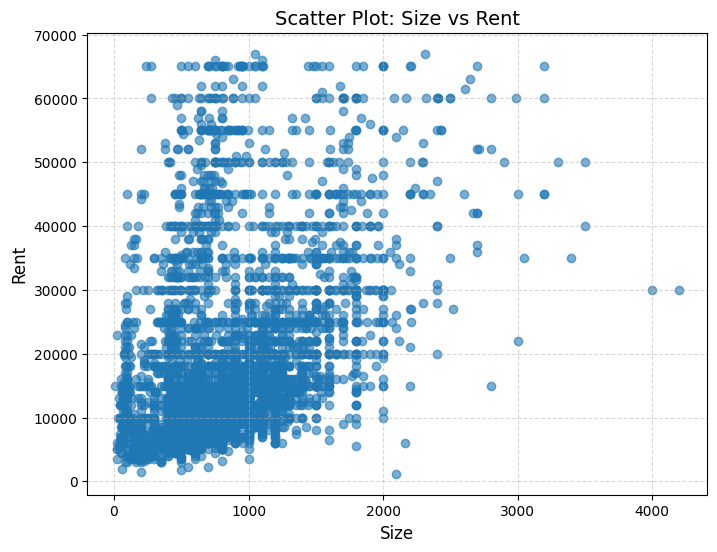

In [18]:

plt.figure(figsize=(8, 6))
plt.scatter(df_clean["Size"], df_clean["Rent"], alpha=0.6)

plt.title("Scatter Plot: Size vs Rent", fontsize=14)
plt.xlabel("Size", fontsize=12)
plt.ylabel("Rent", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()

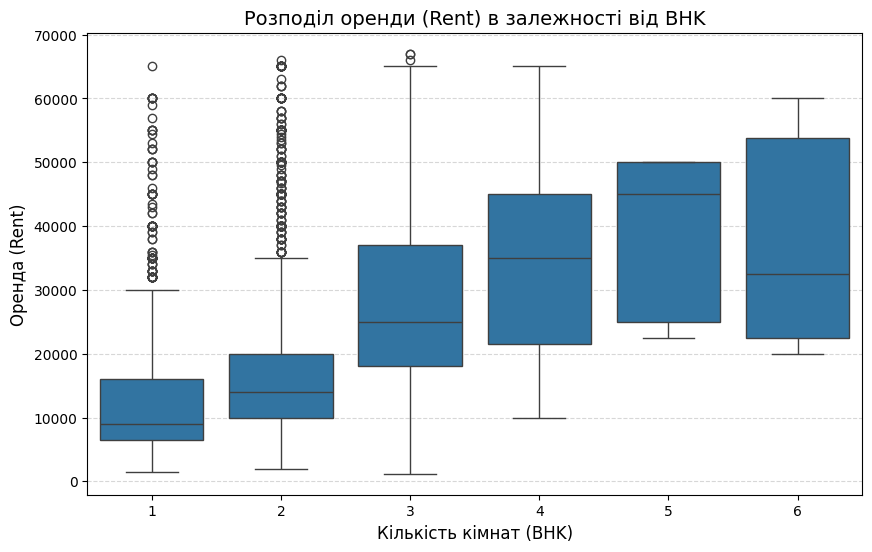

In [19]:
# box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="BHK", y="Rent", data=df_clean)

plt.title("Розподіл оренди (Rent) в залежності від BHK", fontsize=14)
plt.xlabel("Кількість кімнат (BHK)", fontsize=12)
plt.ylabel("Оренда (Rent)", fontsize=12)

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

## Завдання 4: Feature Engineering та підготовка даних (4 бали)

**Що потрібно зробити:**
1. Закодуйте категоріальні змінні за допомогою One-Hot Encoding. Пригадайте, що в лекції ми говорили щодо кодування кат. змінних з великої кількістю різних значень і як працювати з такими випадками. Ви можете закодувати не всі кат. змінні, а лише ті, що вважаєте за потрібні (скажімо ті, що мають відносно небагато різних значень).
2. **Опціонально (по 0.5 бала за кожну доцільну ознаку):** Додайте нові ознаки, обчислені на основі наявних даних, які б на ваш погляд були корисними для моделі
3. Виберіть ознаки для побудови моделі (виключіть непотрібні колонки). Виключити можна, наприклад, ті колонки, які мають категоріальний тип і забагато (більше 20) різних значень. Треба виключити хоча б 1 колонку.
4. Розділіть дані на ознаки (X) та цільову змінну (y)
5. Застосуйте стандартизацію до числових ознак


In [20]:
categorical_colum = [
    'Area Type',
    'City',
    'Furnishing Status',
    'Tenant Preferred',
    'Point of Contact'
]

df_clean_new = pd.get_dummies(df_clean, columns=categorical_colum)

In [ ]:
df_clean_new.head()

,Posted On,BHK,Rent,Size,Floor,Area Locality,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2022-05-18,2,10000,1100,Ground out of 2,Bandel,2,False,False,True,...,False,False,False,True,False,True,False,False,False,True
1,2022-05-13,2,20000,800,1 out of 3,"Phool Bagan, Kankurgachi",1,False,False,True,...,False,False,True,False,False,True,False,False,False,True
2,2022-05-16,2,17000,1000,1 out of 3,Salt Lake City Sector 2,1,False,False,True,...,False,False,True,False,False,True,False,False,False,True
3,2022-07-04,2,10000,800,1 out of 2,Dumdum Park,1,False,False,True,...,False,False,False,True,False,True,False,False,False,True
4,2022-05-09,2,7500,850,1 out of 2,South Dum Dum,1,False,True,False,...,False,False,False,True,True,False,False,False,False,True


In [21]:
df_model = df_clean_new.drop(columns='Area Locality')

In [22]:
df_clean_new.shape

(4226, 25)

In [23]:
# перевіряю, що колонка дійсно видалилась
df_model.shape

(4226, 24)

In [24]:
# Перетворюємо 'Posted On' у формат дати
df_model['Posted On'] = pd.to_datetime(df_model['Posted On'])

# Створюємо нові числові ознаки
df_model['Year'] = df_model['Posted On'].dt.year
df_model['Month'] = df_model['Posted On'].dt.month
df_model['DayOfWeek'] = df_model['Posted On'].dt.weekday

In [25]:
df_model = df_model.drop(columns=['Posted On', 'Floor'])

In [26]:
# Визначаємо X (ознаки) та y (ціль)
X = df_model.drop(columns=['Rent'])  # Ознаки
y = df_model['Rent']  # Цільова змінна

print(f"\nРозмір X (ознак): {X.shape}")
print(f"Розмір y (цілі): {y.shape}")


Розмір X (ознак): (4226, 24)
Розмір y (цілі): (4226,)


In [27]:
numeric_metrics = ['BHK', 'Size', 'Bathroom']

X_scaled = X.copy()
# Створюємо та застосовуємо скейлер
scaler = StandardScaler()
X_scaled[numeric_metrics] = scaler.fit_transform(X[numeric_metrics])

# Перетворюємо назад у DataFrame для зручності
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

## Завдання 5: Розділення даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на навчальну (80%) та тестову (20%) вибірки.
2. Створіть модель лінійної регресії.
3. Навчіть модель на навчальних даних.
4. Виведіть усі коефіцієнти моделі (ваги) та напишіть, які 2 ознаки найбільше впливають на прогноз.
5. Зробіть прогнози на тренувальній та тестовій вибірках.

In [28]:
# Розділяємо дані: 80% на навчання, 20% на тест
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y,
    test_size=0.2,  # 20% даних йде на тест
    random_state=42  # фіксуємо випадковість для відтворюваності
)

In [29]:
# Створюємо модель
model = LinearRegression()

# Навчаємо модель на навчальних даних
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Виводимо ваги для кожної ознаки
for feature, weight in zip(model.feature_names_in_, model.coef_):
    print(f"{feature}: {weight:.2f}")

print(f"\nЗміщення (intercept): {model.intercept_:.2f}")

BHK: 2626.95
Size: 3872.06
Bathroom: 1807.76
Area Type_Built Area: 1540.55
Area Type_Carpet Area: -677.16
Area Type_Super Area: -863.40
City_Bangalore: -2218.85
City_Chennai: -3515.71
City_Delhi: -276.39
City_Hyderabad: -4737.30
City_Kolkata: -5559.11
City_Mumbai: 16307.36
Furnishing Status_Furnished: 2644.70
Furnishing Status_Semi-Furnished: -751.62
Furnishing Status_Unfurnished: -1893.09
Tenant Preferred_Bachelors: 974.38
Tenant Preferred_Bachelors/Family: 333.20
Tenant Preferred_Family: -1307.58
Point of Contact_Contact Agent: 4888.09
Point of Contact_Contact Builder: -1154.45
Point of Contact_Contact Owner: -3733.64
Year: 0.00
Month: 321.20
DayOfWeek: 121.94

Зміщення (intercept): 20470.70


на ринок оренди вприває місто, самий дорогий - City_Mumbai: 16307.36

також оренда через агентів коштує дорожче - Point of Contact_Contact Agent: 4888.09

не можливо не помітити, що головні числові признаки також мають вагу:


*   BHK: 2626.95
*   Size: 3872.06
*   Bathroom: 1807.76



In [31]:
# Прогнози на тренувальній вибірці
y_train_pred = model.predict(X_train)

# Прогнози на тестовій вибірці (нові дані!)
y_test_pred = model.predict(X_test)

# Порівняння перших 10 прогнозів з реальністю
comparison = pd.DataFrame({
    'Реальний Rent': y_test.values[:10],
    'Прогнозований Rent': y_test_pred[:10].round(0),
    'Помилка': (y_test.values[:10] - y_test_pred[:10]).round(0)
})
print("Приклади прогнозів на тестовій вибірці:")
print(comparison)

Приклади прогнозів на тестовій вибірці:
   Реальний Rent  Прогнозований Rent  Помилка
0          22000             28838.0  -6838.0
1           5000              3744.0   1256.0
2          37000             40054.0  -3054.0
3           8000              2754.0   5246.0
4          15000             15141.0   -141.0
5          20000             24286.0  -4286.0
6           8500             17340.0  -8840.0
7           7000              4115.0   2885.0
8           3000               505.0   2495.0
9           8000              5791.0   2209.0


## Завдання 6: Оцінка якості моделі (2 бали)

**Що потрібно зробити:**
1. Обчисліть MAE, RMSE та R² для навчальної та тестової вибірок
2. Порівняйте метрики та зробіть висновок про якість моделі
3. Проаналізуйте і дайте висновок, чи є ознаки перенавчання або недонавчання (**Нагадування**: перенавчання - коли модель дуже добре працює на тренувальних даних, але погано на тестових; недонавчання - коли модель погано працює навіть на тренувальних даних)
4. Побудуйте графік розсіювання "реальні vs прогнозовані значення" та зробіть висновок про якість моделі


In [32]:
# Розраховуємо метрики для тестової вибірки
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)


print("МЕТРИКИ ЯКОСТІ МОДЕЛІ (на тестовій вибірці):")
print(f"MAE: {mae:.2f} $")
print(f"RMSE: {rmse:.2f} $")
print(f"R²: {r2:.3f}")

# Порівняння з навчальною вибіркою
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2_train = r2_score(y_train, y_train_pred)

print("\nМЕТРИКИ ЯКОСТІ МОДЕЛІ на тренувальній вибірці:")
print(f"MAE: {mae:.2f} $")
print(f"RMSE: {rmse:.2f} $")
print(f"R²: {r2_train:.3f}")

МЕТРИКИ ЯКОСТІ МОДЕЛІ (на тестовій вибірці):
MAE: 5531.54 $
RMSE: 7722.23 $
R²: 0.689

МЕТРИКИ ЯКОСТІ МОДЕЛІ на тренувальній вибірці:
MAE: 5550.01 $
RMSE: 7691.82 $
R²: 0.690


середня похибка моделі (МАЕ) складає приблизно 5,5 тис дол

RMSE - більш "чутлива" до великих відхилень, тобто може помилятись на 7,7 тис дол

R квадрат 0,69 говорить, що модель пояснює 69% варіації орендної плати

In [33]:
np.mean(y_train)

np.float64(19349.54852071006)

так як МАЕ на трейні і на тесті майже однакові, то можна казати, що модель натренувалась доволі адекватно і перетренування немає

також R квадрат 0,69 говорить про те, що модель не ідеально працює, але дуже хорошо

In [34]:
# Візуалізація: реальні vs прогнозовані значення
fig = px.scatter(
    x=y_test,
    y=y_test_pred,
    title='Реальна vs Прогнозована орендна плата (тестова вибірка)',
    labels={'x': 'Реальна оренда', 'y': 'Прогнозована оренда'},
    opacity=0.6
)

# Додаємо ідеальну лінію (де прогноз = реальність)
max_val = max(y_test.max(), y_test_pred.max())
fig.add_trace(
    go.Scatter(
        x=[0, max_val],
        y=[0, max_val],
        mode='lines',
        name='Ідеальний прогноз',
        line=dict(color='red', dash='dash')
    )
)

fig.update_layout(height=500)
fig.show()

на вартості до 40к модель, як переоцінює так і недооцінює орендну плату (тобто більш-менш адекватна для середнього сегмента). Після вартості в 40к модель повністю недооцінює оренду (тобто вже не корректно працює з більш дорогим сегментом, не уловлює залежностей, наприклад від більш дорого району)

## Завдання 7: Аналіз помилок (4 бали)

**Що потрібно зробити:**
1. Обчисліть помилки (residuals = реальні - прогнозовані значення)
2. Побудуйте гістограму розподілу помилок
3. Створіть scatter plot помилок відносно величини прогнозованих значень. Чи росте помилка з ростом прогнозованого значення?
4. Знайдіть 5 прогнозів з найбільшими помилками
5. Проаналізуйте, на яких типах житла модель помиляється найбільше. Типи можна розрізняти за кількістю кімнат чи містом, наприклад.
6. Подумайте і напишіть, які наступні кроки ви б зробили, аби поліпшити якість моделі. Опціонально можна їх зробити і ми перевіримо :)

In [35]:
# Розраховуємо помилки (залишки)
residuals = y_test - y_test_pred

# Гістограма помилок
fig = px.histogram(
    x=residuals,
    nbins=50,
    title='Розподіл помилок прогнозування',
    labels={'x': 'Помилка (реальні - прогнозовані)', 'count': 'Кількість'},
    color_discrete_sequence=['green']
)
fig.add_vline(x=0, line_dash="dash", line_color="black", annotation_text="Ідеальний прогноз")
fig.update_layout(height=400)
fig.show()

In [36]:
# Scatter plot: помилки vs прогнозовані значення
fig = px.scatter(
    x=y_test_pred,
    y=residuals,
    title='Залежність помилок від прогнозованих значень',
    labels={'x': 'Прогнозована орендна плата', 'y': 'Помилка'},
    opacity=0.5
)

# Додаємо горизонтальну лінію на 0
fig.add_hline(y=0, line_dash="dash", line_color="red", annotation_text="Без помилки")

fig.update_layout(height=400)
fig.show()

так помиока зростає разом і зростом прогнозованного значення, це видно по більшому розкиду точок після 30к

In [44]:
# Знаходимо найбільші помилки
errors_df = pd.DataFrame({
    'real': y_test.values,
    'predicted': y_test_pred.round(2),
    'error': np.abs(residuals.round(2))
})

# Топ-5 найбільших помилок
top_errors = errors_df.nlargest(5, 'error')
print("Прогнози з найбільшими помилками прогнозування:")
print(top_errors)

Прогнози з найбільшими помилками прогнозування:
       real  predicted     error
3962  65000   32171.42  32828.58
549    8000   40086.74  32086.74
904    8000   37782.26  29782.26
3520  65000   35439.54  29560.46
275   30000   59316.37  29316.37


In [45]:
y_pred = model.predict(X_test)
errors = y_test - y_pred

results = X_test.copy()
results['Real Rent'] = y_test
results['Pred Rent'] = y_pred
results['Error'] = errors

results['BHK_orig'] = X.loc[results.index, 'BHK']

city_cols = [c for c in results.columns if c.startswith('City_')]
if city_cols:
    results['City_name'] = results[city_cols].idxmax(axis=1).str.replace('City_', '')
else:
    if 'City' in X.columns:
        results['City_name'] = X.loc[results.index, 'City']
    else:
        results['City_name'] = 'unknown'

bhk_stats = results.groupby('BHK_orig')['Error'].agg(['count', 'mean']).sort_index()
city_stats = results.groupby('City_name')['Error'].agg(['count', 'mean']).sort_values('mean')

print("Помилка моделі по ВНК:")
display(bhk_stats.round(2))

print("\nПомилка моделі по містам:")
display(city_stats.round(2))


Помилка моделі по ВНК:


,count,mean
BHK_orig,,
1,224,746.03
2,450,-926.39
3,152,1305.34
4,17,-3844.48
5,1,-4937.45
6,2,5317.21



Помилка моделі по містам:


,count,mean
City_name,,
Kolkata,131,-1384.08
Mumbai,118,-984.61
Bangalore,174,-321.05
Hyderabad,165,134.07
Chennai,143,190.72
Delhi,115,1677.86


Модель недооцінюю і переоцінюєє 5 і 6 кімнатні квартири, але тут майже відсутня вибірка і на нічому тренуватись. Тобто модель не дуже працює з великими квартирами є велике недооцінення і4 -ч кімнатної квартири, по 1-3 кімнатним квартирам модель працюю доволі стабільно

по містам найбільша переоцінка в Delhi, а недооцінка в Kolkata

як варіант використовувати інші моделі для прогнозування даних